### [과제]
load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- 오차행렬, 정확도, 정밀도, 재현율, F1, AUC를 포함한 평가 사용자함수 작성
- dt로 분류모델 생성 및 평가(학습:검증 = 8:2)
- cv=5를 적용한 교차검증 및 모델 복잡도 제어를 위한 파라미터를 적용하여 모델 생성 및 평가
- 결정트리를 시각화하여 분석
- 특성 중요도를 시각화

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, roc_auc_score

def get_tree_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred)
    print('오차행렬:\n',confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\
    F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,auc))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = \
train_test_split(cancer.data, cancer.target, \
                 test_size=0.2, stratify=cancer.target, random_state=150)
# dt_tree = DecisionTreeClassifier()
dt_tree = DecisionTreeClassifier()
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)

get_tree_eval(y_test,pred)

오차행렬:
 [[40  2]
 [ 9 63]]
정확도:0.9035, 정밀도:0.9692, 재현율:0.8750,    F1:0.9197, AUC:0.9137


In [10]:
# 교차검증 및 하이퍼파라미터 튜닝
import numpy as np
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = \
train_test_split(cancer.data, cancer.target, test_size=0.2, \
                 stratify=cancer.target, random_state=150)
params = {'max_depth':[2,3,4,5,6]}
gclf = GridSearchCV(dt_tree, param_grid=params, scoring='accuracy',\
                    cv=5,verbose=1)
gclf.fit(X_train,y_train)
print('최고 정확도:',np.round(gclf.best_score_,4))
print('최적 하이퍼파라미터:',gclf.best_params_)

best_gclf = gclf.best_estimator_
gpred = best_gclf.predict(X_test)
get_tree_eval(y_test,gpred)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
최고 정확도: 0.9407
최적 하이퍼파라미터: {'max_depth': 3}
오차행렬:
 [[40  2]
 [12 60]]
정확도:0.8772, 정밀도:0.9677, 재현율:0.8333,    F1:0.8955, AUC:0.8929


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


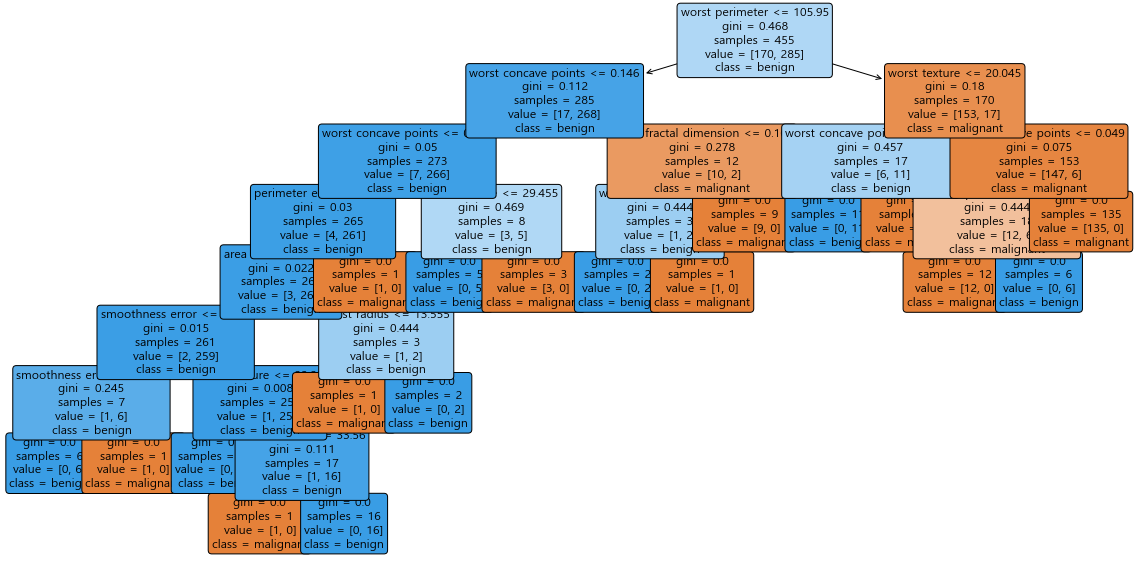

In [31]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier()
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(dt_tree, out_file="tree.dot", class_names=\
                ["악성", "양성"],feature_names=cancer.feature_names,\
                impurity=False, filled=True, rounded=True)

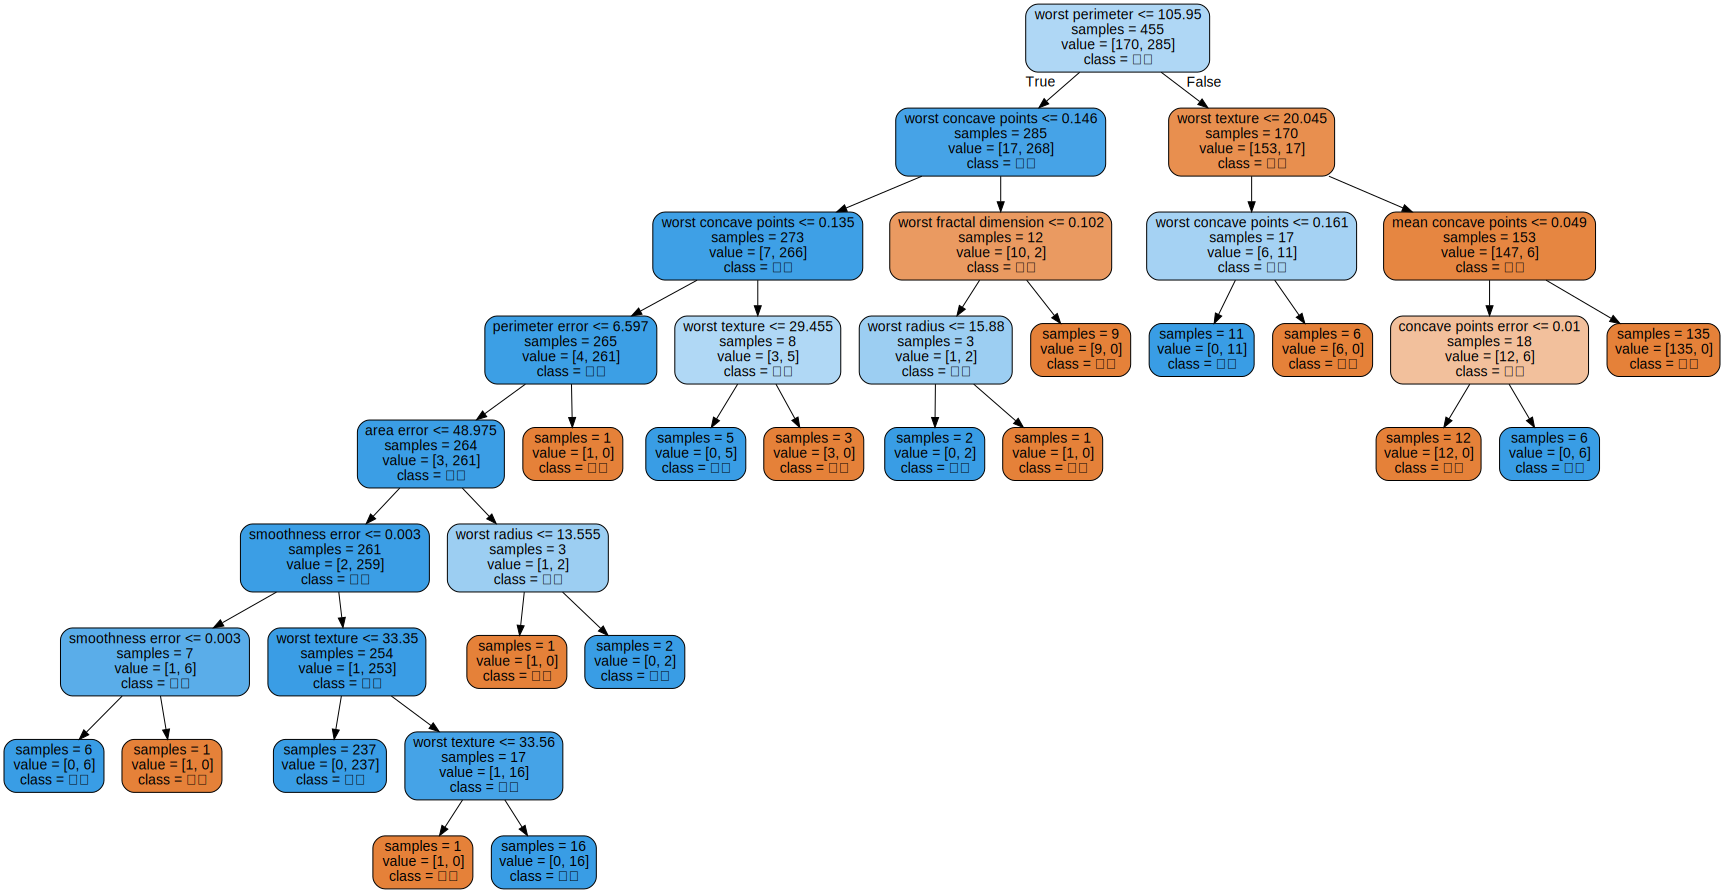

In [33]:
import graphviz

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [24]:
print("특성 중요도:\n", dt_tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.05882216 0.01041643 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05888344 0.78328966 0.
 0.         0.         0.         0.08858832 0.         0.        ]


In [27]:
%pwd


'C:\\Caba2012\\workspace\\Caba_ml'

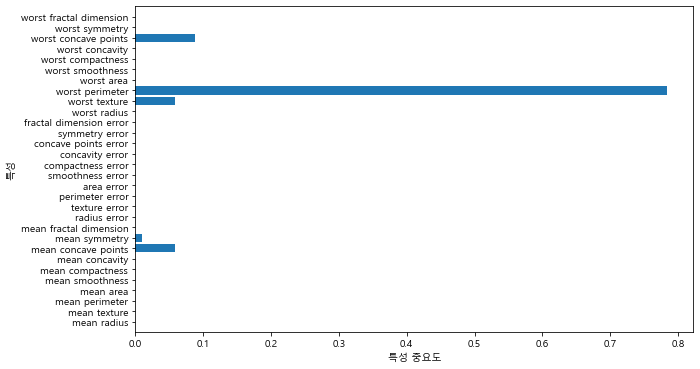

In [29]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
def plot_feature_importances_cancer(model):
    # matplotlib 한글 폰트 오류 문제 해결
    from matplotlib import font_manager, rc
    font_path = "dataset/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font',family=font_name)
    
    n_features = cancer.data.shape[1]
    fig = plt.figure(figsize=(10,6))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dt_tree)